# EDA and Cleaning Data 
***Summary***
- We are collecting weather data from [Visaul Crossing Weather Webstie](https://www.visualcrossing.com/) on the state of California. We were able to gather data from 1950-2022.
- The datasets have various features regarding temperature, wind, perpcipitation, solar energy, and atmospheric phases. As described in the data description [Visual Crossing Data Dictionary](https://www.visualcrossing.com/resources/documentation/weather-data/weather-data-documentation/), most numeric rows are averages based on the region selected (California). 
- In this notebook we will concatenate our data and deal with missing values. We will also manipulate features that we want to incorperate and drop any columns unnecessary to our model. Finally we will setup our index as a formatted date column. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

- Reading in all datasets and concatonating them.

In [2]:
cal_hist = pd.read_csv('../data/California 1970-01-01 to 1990-01-01.csv')

In [3]:
cal_hist.shape

(7306, 33)

In [4]:
cal_current = pd.read_csv('../data/California 1990-02-01 to 2022-01-01.csv')

In [5]:
cal_current.shape

(11658, 33)

In [6]:
df = pd.concat([cal_hist, cal_current])

In [7]:
df.shape

(18964, 33)

In [8]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18964 entries, 0 to 11657
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              18964 non-null  object 
 1   datetime          18964 non-null  object 
 2   tempmax           18964 non-null  float64
 3   tempmin           18964 non-null  float64
 4   temp              18964 non-null  float64
 5   feelslikemax      18964 non-null  float64
 6   feelslikemin      18964 non-null  float64
 7   feelslike         18964 non-null  float64
 8   dew               18964 non-null  float64
 9   humidity          18964 non-null  float64
 10  precip            18234 non-null  float64
 11  precipprob        18964 non-null  int64  
 12  precipcover       18964 non-null  float64
 13  preciptype        3639 non-null   object 
 14  snow              0 non-null      float64
 15  snowdepth         735 non-null    float64
 16  windgust          3164 non-null   float64
 17

In [10]:
df.isnull().sum()[lambda x: x > 0]

precip              730
preciptype        15325
snow              18964
snowdepth         18229
windgust          15800
winddir               2
solarradiation    14579
solarenergy       14579
uvindex           14579
severerisk        18964
dtype: int64

## Removing Columns
- We can see columns 'snow' and 'severerisk' have all null values. This alligns with California's recent history containing no snow or severe weather abnormalities. We will remove these columns including 'snowdepth' because they do not relate to our region. 
- We can also see some missing rows in our target variable. Because we can't have any missing values in our model we will remove any rows with null values for 'precip'. Removing these rows is acceptable considering it only covers 4% of our data. 


In [11]:
df.dropna(subset=['precip'], inplace=True)

In [12]:
df.shape

(18234, 33)

In [13]:
df.drop(columns=['snow', 'snowdepth', 'severerisk'], inplace=True)

In [14]:
df.shape

(18234, 30)

In [15]:
df.isnull().sum()[lambda x: x > 0]

preciptype        14595
windgust          15070
winddir               1
solarradiation    13849
solarenergy       13849
uvindex           13849
dtype: int64

## Feature Engineering 
***We can see two columns that we can manipulate.***
- 'winddir' has one missing value. We can fill this in with the mean value of the column with minimal impact on our model. 
- 'icon' is an object column that has descriptors of different weather conditions. We will dummify these columns to use them as features in our model
- There are 9 object columns that we can explore. 

- Replacing single missing value of 'winddir' with mean of column

In [16]:
df['winddir'].isnull().sum()

1

In [17]:
mean = df['winddir'].mean()

In [18]:
df['winddir'] = df['winddir'].fillna(mean)

In [19]:
df['winddir'].isnull().sum()

0

### EDA on Object columns

In [20]:
obj = [i for i in df.columns if df[i].dtype == 'O']

In [21]:
obj

['name',
 'datetime',
 'preciptype',
 'sunrise',
 'sunset',
 'conditions',
 'description',
 'icon',
 'stations']

***'name', 'datetime', and 'preciptype' will not but observed in this feature engineering because:***
- 'name' has the same value for every row ('California')
- 'datetime' will become our index in our last cleaning step
- 'preciptype' has similar information to 'icon' however we will use 'icon' because it has more descriptors

In [22]:
df['icon'].value_counts()

icon
clear-day            9483
partly-cloudy-day    4628
rain                 3639
cloudy                364
fog                    98
wind                   22
Name: count, dtype: int64

- 'icon' has descriptors that can be helpful features. We will dummify this column to be able to use these features. 

In [23]:
df[['clear-day', 'cloudy', 'fog', 'partly-cloudy-day', 'rain_icon', 'wind']] = pd.get_dummies(df['icon'], dtype='int')

In [24]:
df['clear-day'].value_counts()

clear-day
1    9483
0    8751
Name: count, dtype: int64

In [25]:
df['wind'].value_counts()

wind
0    18212
1       22
Name: count, dtype: int64

In [26]:
df['sunset'].unique()

array(['1970-01-01T16:55:28', '1970-01-02T16:56:17',
       '1970-01-03T16:57:08', ..., '2021-12-30T16:54:08',
       '2021-12-31T16:54:55', '2022-01-01T16:55:43'], dtype=object)

In [27]:
df['sunset'].unique()

array(['1970-01-01T16:55:28', '1970-01-02T16:56:17',
       '1970-01-03T16:57:08', ..., '2021-12-30T16:54:08',
       '2021-12-31T16:54:55', '2022-01-01T16:55:43'], dtype=object)

- 'sunset' and 'sunrise' columns are dates as strings. Could see use for these but need to research how to do it. 

In [28]:
df['conditions'].value_counts()

conditions
Clear                           9502
Partially cloudy                4663
Rain, Partially cloudy          2306
Rain, Overcast                  1022
Overcast                         430
Rain                             291
Snow, Rain, Partially cloudy      11
Snow, Rain, Overcast               5
Snow, Rain                         4
Name: count, dtype: int64

- 'conditions' column is redundant because we are using very similar features with 'icon'

In [29]:
df['stations'].value_counts()

stations
74516023202,72483023232,72483993225,72483623208,72492023237,72483793216                                    6198
74516023202,72483023232,72483993225                                                                        3357
72483023232                                                                                                1460
KSMF,72483023232,KLHM,72483993225,72483323206,KSAC,72057600174,KMHR                                        1141
74516023202,72482893241,72483023232,72483993225,72483323206                                                1052
                                                                                                           ... 
KSMF,72483023232,KLHM,72483993225,AN063,72483323206,KSAC,CI155,72057600174,CI235,D6184,KMHR                   1
KSMF,72482893241,72483023232,KLHM,72483993225,AN063,72483323206,KSAC,CI155,72057600174,KMHR                   1
E9060,KSMF,72482893241,72483023232,KLHM,72483993225,AN063,72483323206,KSAC,CI155,72057600174,CI

- 'stations' columns shows the coordinates for weather stations. This imformation is not helpful to determine precperation

In [30]:
df['description'].value_counts().head()

description
Clear conditions throughout the day.           9492
Partly cloudy throughout the day.              3685
Clearing in the afternoon.                      513
Becoming cloudy in the afternoon.               475
Partly cloudy throughout the day with rain.     467
Name: count, dtype: int64

- 'description' column are sentence descriptor versions of similar information that 'icon' has. 

## Removing Columns with more than half missing values
- The data dictionary for this dataset mentions that all missing values cannot be replaced with 0's because 0 is a measurement that is used often in this dataset
- Besides 'winddir' all other columns that have a majority of missing data are floats or integers, making filling those values dangerous to do. 

In [31]:
col_drop = [i for i in df.columns if df[i].isnull().sum() > (len(df) / 2)]

In [32]:
col_drop

['preciptype', 'windgust', 'solarradiation', 'solarenergy', 'uvindex']

In [33]:
df.drop(columns = col_drop, inplace = True)

In [34]:
df.isnull().sum()

name                 0
datetime             0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
windspeed            0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
sunrise              0
sunset               0
moonphase            0
conditions           0
description          0
icon                 0
stations             0
clear-day            0
cloudy               0
fog                  0
partly-cloudy-day    0
rain_icon            0
wind                 0
dtype: int64

## Convert and index Date Column 

In [35]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [36]:
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,conditions,description,icon,stations,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
datetime,,,,,,,,,,,,,,,,,,,,,
1970-01-01,California,52.7,29.5,37.5,52.7,29.5,37.0,29.7,74.3,0.0,...,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0
1970-01-02,California,53.5,27.4,38.2,53.5,27.4,38.0,29.1,70.8,0.0,...,Clear,Clear conditions throughout the day.,clear-day,"74516023202,99999923232,72483623208,72483793216",1,0,0,0,0,0
1970-01-03,California,52.4,27.5,38.5,52.4,27.5,37.8,27.7,66.3,0.0,...,Clear,Clear conditions throughout the day.,clear-day,"74516023202,99999923232,72483623208,72483793216",1,0,0,0,0,0
1970-01-04,California,50.3,27.4,36.9,50.3,26.4,34.8,27.5,69.6,0.0,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0
1970-01-05,California,48.5,27.2,36.4,48.5,24.4,35.5,27.9,71.8,0.0,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"74516023202,99999923232,72483623208,72483793216",0,0,0,1,0,0


In [37]:
df.tail()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,conditions,description,icon,stations,clear-day,cloudy,fog,partly-cloudy-day,rain_icon,wind
datetime,,,,,,,,,,,,,,,,,,,,,
2021-12-28,California,46.0,36.3,41.7,44.8,36.3,40.6,35.8,79.9,0.002,...,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"KSMF,TS389,72483023232,KLHM,72483993225,724833...",0,0,0,0,1,0
2021-12-29,California,43.8,41.2,42.3,38.6,35.2,36.9,40.2,92.3,0.555,...,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"KSMF,TS389,72483023232,KLHM,72483993225,TCICA,...",0,0,0,0,1,0
2021-12-30,California,52.0,38.8,44.2,52.0,35.3,41.8,40.0,85.8,0.000,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KSMF,TS389,72483023232,KLHM,72483993225,TCICA,...",0,0,0,1,0,0
2021-12-31,California,52.1,37.0,42.4,52.1,34.3,40.5,37.7,84.7,0.000,...,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KSMF,TS389,72483023232,KLHM,72483993225,724833...",0,0,0,1,0,0
2022-01-01,California,50.5,34.8,40.1,50.5,27.3,36.8,30.7,70.9,0.000,...,Clear,Clear conditions throughout the day.,clear-day,"KSMF,TS389,72483023232,KLHM,72483993225,724833...",1,0,0,0,0,0


#### We are seeing no specific trends in our dataset so we will not need to convert our data

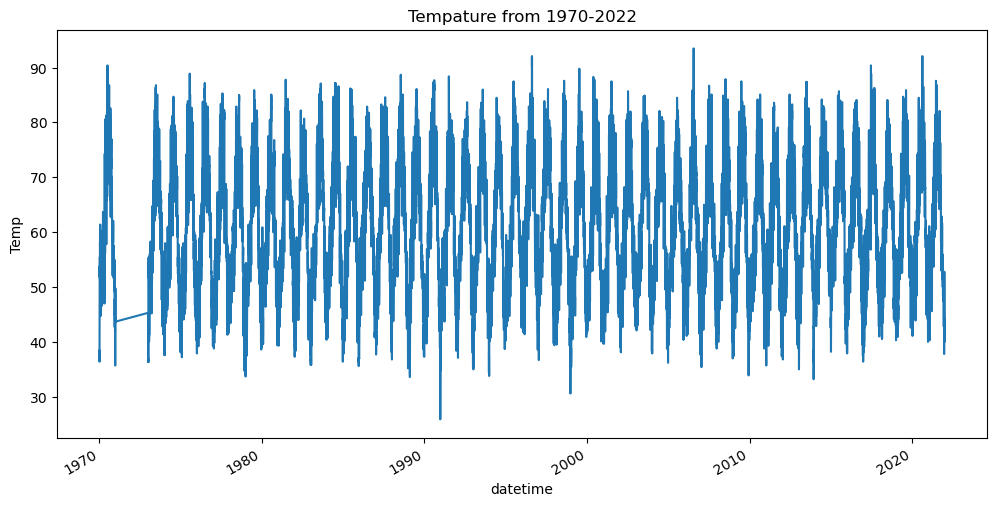

In [38]:
df['temp'].plot(figsize=(12,6))
plt.title('Tempature from 1970-2022')
plt.ylabel('Temp');

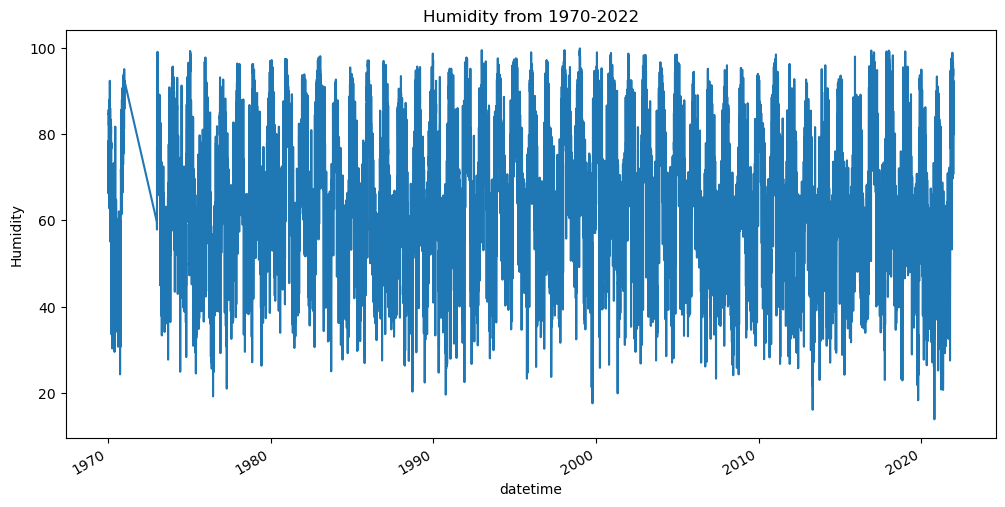

In [39]:
df['humidity'].plot(figsize=(12,6))
plt.title('Humidity from 1970-2022')
plt.ylabel('Humidity');

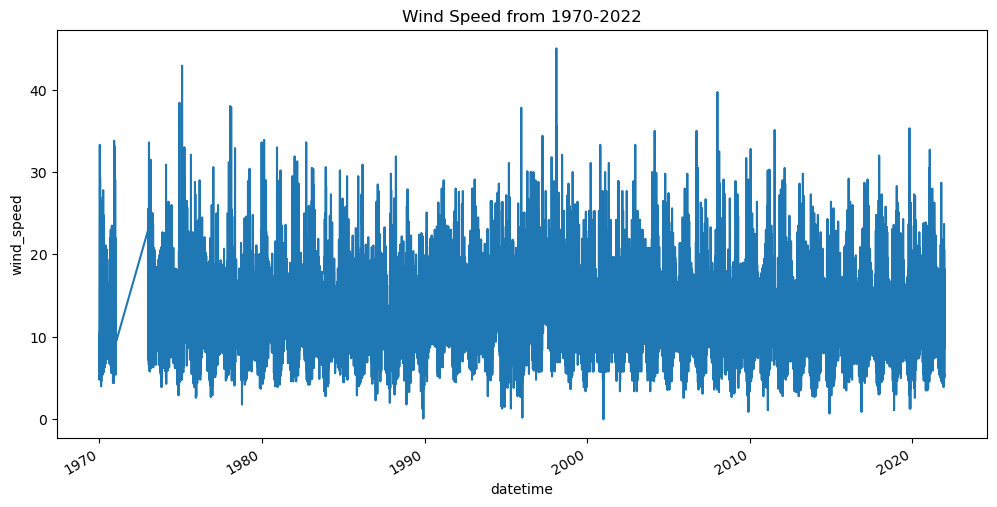

In [40]:
df['windspeed'].plot(figsize=(12,6))
plt.title('Wind Speed from 1970-2022')
plt.ylabel('wind_speed');

- There is a noticable gap in our dataset in the mid 1970's. Will search for data during that time. 

In [41]:
df.to_csv('../data/eda_data.csv', index_label='datetime')